Modelos a valorar:
* Random Forest
* XGBoost
* Redes Neuronales Multicapa (MLP)
* Redes Neuronales Convolucionales (CNN)
* Redes Neuronales Recurrentes (RNN) -> LSTM

Librerias a utilizar:
* h2o

In [74]:
import h2o
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

Preprocesamiento de los datos

In [98]:
def cargar_dataset(ruta_zip, nombre_tsv):
    with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
        with archivo_zip.open(nombre_tsv) as archivo_tsv:
            dataset = pd.read_csv(archivo_tsv, sep='\t')
    return dataset

def preprocesar_dataset(dataset):
    dataset['name'] = dataset['name'].astype('str')
    dataset['comment'] = dataset['comment'].astype('str')
    return dataset

def to_Excel(datasets, path="../../tmp/excel.xlsx"):
    with pd.ExcelWriter(path) as writer:
        for i, df in enumerate(datasets, start=1):  # start=1 para que los números empiecen desde 1
            df.to_excel(writer, sheet_name=str(i), index=False)

def guardar_como_excel(df, nombre_archivo="../../tmp/excel_1.xlsx", hoja='Sheet1'):
    try:
        df.to_excel(nombre_archivo, sheet_name=hoja, index=False)
        print(f"Archivo guardado exitosamente como '{nombre_archivo}'")
    except Exception as e:
        print(f"Error al guardar el archivo: {e}")

In [76]:
df = cargar_dataset('../../data/RepoRT_classified_CCinformation.zip', 'RepoRT_classified_CCinformation.tsv')
df = preprocesar_dataset(df)

C:\Users\cmora\AppData\Local\Temp\ipykernel_8780\1037544544.py:4: DtypeWarning: Columns (1,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(archivo_tsv, sep='\t')


Creación, eliminación y codificación de columnas.

In [7]:
df

,id,name,formula,rt,smiles.std,inchi.std,inchikey.std,classyfire.kingdom,classyfire.superclass,classyfire.class,...,eluent.2.trieth 17,eluent.2.triprop 17,eluent.2.tribut 17,eluent.2.nndimethylhex 17,eluent.2.medronic 17,eluent.2.pH 17,t 17,eluent.1 17,eluent.2 17,flow_rate 17
0,0001_00001,epicatechin,C15H14O6,12.0700,C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C3)O)O)O,InChI=1S/C15H14O6/c16-8-4-11(18)9-6-13(20)15(2...,PFTAWBLQPZVEMU-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Phenylpropanoids and polyketides (CHEMONTID:00...,Flavonoids (CHEMONTID:0000334),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0001_00002,epicatechin gallate,C22H18O10,15.9900,C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C3)O)O)OC...,InChI=1S/C22H18O10/c23-11-6-14(25)12-8-19(32-2...,LSHVYAFMTMFKBA-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Phenylpropanoids and polyketides (CHEMONTID:00...,Flavonoids (CHEMONTID:0000334),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0001_00003,gallocatechin,C15H14O7,8.6750,C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C(=C3)O)O)O)O,InChI=1S/C15H14O7/c16-7-3-9(17)8-5-12(20)15(22...,XMOCLSLCDHWDHP-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Phenylpropanoids and polyketides (CHEMONTID:00...,Flavonoids (CHEMONTID:0000334),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0001_00004,"3,5-dihydroxybenzoic acid",C7H6O4,7.7500,C1=C(C=C(C=C1O)O)C(=O)O,InChI=1S/C7H6O4/c8-5-1-4(7(10)11)2-6(9)3-5/h1-...,UYEMGAFJOZZIFP-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Benzenoids (CHEMONTID:0002448),Benzene and substituted derivatives (CHEMONTID...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0001_00005,4-hydroxybenzoic acid,C7H6O3,10.6000,C1=CC(=CC=C1C(=O)O)O,"InChI=1S/C7H6O3/c8-6-3-1-5(2-4-6)7(9)10/h1-4,8...",FJKROLUGYXJWQN-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Benzenoids (CHEMONTID:0002448),Benzene and substituted derivatives (CHEMONTID...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164341,0391_013304,RG7800,C24H28N6O,2.5790,CCC1=NC(=CN2C1=CC(=N2)C3=CC(=O)N4C=C(C=C(C4=N3...,InChI=1S/C24H28N6O/c1-5-19-22-11-21(27-30(22)1...,GYFRQCMDLBNZSF-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Organoheterocyclic compounds (CHEMONTID:0000002),Pyridopyrimidines (CHEMONTID:0001859),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164342,0391_013305,1093403-33-8,C26H24N6O2S2,3.5427,CC1=C(SC(=N1)C2=CN=CC=C2)C(=O)NC3=CC=CC=C3C4=C...,InChI=1S/C26H24N6O2S2/c1-17-23(36-25(28-17)18-...,LAMQVIQMVKWXOC-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Benzenoids (CHEMONTID:0002448),Benzene and substituted derivatives (CHEMONTID...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164343,0391_013307,Oglemilast,C20H13Cl2F2N3O5S,3.7782,CS(=O)(=O)NC1=CC2=C(C=C1)OC3=C(C=CC(=C23)C(=O)...,"InChI=1S/C20H13Cl2F2N3O5S/c1-33(29,30)27-9-2-4...",OKFDRAHPFKMAJH-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Organoheterocyclic compounds (CHEMONTID:0000002),Benzofurans (CHEMONTID:0000301),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164344,0391_013309,DICHLORISONE ACETATE,C23H28Cl2O5,4.0296,CC(=O)OCC(=O)C1(CCC2C1(CC(C3(C2CCC4=CC(=O)C=CC...,InChI=1S/C23H28Cl2O5/c1-13(26)30-12-19(28)22(2...,YNNURTVKPVJVEI-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Lipids and lipid-like molecules (CHEMONTID:000...,Steroids and steroid derivatives (CHEMONTID:00...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# Creamos la columna n_experimento: representa en el experimento donde se realizó la toma de datos.
df['n_experimento'] = df['id'].str.split('_').str[0]

df['n_experimento'] = df['n_experimento'].astype(int)

In [9]:
# Creamos la columna resultado: representa el resultado al que queremos llegar.
# Para obtener este resultado usamos el modelo basado en la base de datos.
#df['resultado'] = 

In [78]:
# Creamos la columna usp_code: representa el código usp utilizado.
usp_columns = [
    'column.usp.code_0', 'column.usp.code_L1', 'column.usp.code_L10',
    'column.usp.code_L109', 'column.usp.code_L11', 'column.usp.code_L114',
    'column.usp.code_L122', 'column.usp.code_L3', 'column.usp.code_L43',
    'column.usp.code_L68', 'column.usp.code_L7'
]

df['usp_code'] = df[usp_columns].idxmax(axis=1)
df['usp_code'] = df['usp_code'].str.split('_').str[1]

ELIMINAMOS COLUMNAS QUE NO NOS SIRVEN: Generamos el dataset -> df_filtrado

In [ ]:


# Paso 1: Seleccionar las columnas que coincidan con el patrón 'eluent.1.*\s[1-9]\d*'
columnas_a_eliminar = df.filter(regex=r'eluent\.1.*\s[1-9]\d*').columns
print("Columnas 'eluent.1' a eliminar:", columnas_a_eliminar)

# Paso 2: Seleccionar las columnas que coincidan con el patrón 'eluent.2.*\s[1-9]\d*'
columnas_a_eliminar = columnas_a_eliminar.append(df.filter(regex=r'eluent\.2.*\s[1-9]\d*').columns)
print("Columnas 'eluent.2' a eliminar:", columnas_a_eliminar)

# Paso 3: Seleccionar las columnas que coincidan con los patrones 'flowrate' o 't' seguidas de un número distinto de 0
columnas_a_eliminar = columnas_a_eliminar.append(df.filter(regex=r'^(flow_rate|t)\s[1-9]\d*$').columns)
print("Columnas 'flowrate' o 't' a eliminar:", columnas_a_eliminar)

# Paso 4: Seleccionar las columnas 'eluent.1.pH 0' y 'eluent.2.pH 0'
columnas_pH = df.filter(regex=r'eluent\.[12]\.pH\s0').columns
columnas_a_eliminar = columnas_a_eliminar.append(columnas_pH)
print("Columnas 'eluent.1.pH 0' y 'eluent.2.pH 0' a eliminar:", columnas_pH)

# Paso 5: Verificar que las columnas a eliminar no sean vacías
if not columnas_a_eliminar.empty:
    # Crear un nuevo DataFrame sin esas columnas
    df_filtrado = df.drop(columns=columnas_a_eliminar)
    print("Nuevo DataFrame sin las columnas a eliminar.")
else:
    print("No hay columnas que eliminar según los patrones especificados.")


Columnas 'eluent.1' a eliminar: Index(['eluent.1.h2o 1', 'eluent.1.meoh 1', 'eluent.1.acn 1',
       'eluent.1.iproh 1', 'eluent.1.acetone 1', 'eluent.1.hex 1',
       'eluent.1.chcl3 1', 'eluent.1.ch2cl2 1', 'eluent.1.hept 1',
       'eluent.1.formic 1',
       ...
       'eluent.1.nh4bicarb 17', 'eluent.1.nh4f 17', 'eluent.1.nh4oh 17',
       'eluent.1.trieth 17', 'eluent.1.triprop 17', 'eluent.1.tribut 17',
       'eluent.1.nndimethylhex 17', 'eluent.1.medronic 17', 'eluent.1.pH 17',
       'eluent.1 17'],
      dtype='object', length=442)
Columnas 'eluent.2' a eliminar: Index(['eluent.1.h2o 1', 'eluent.1.meoh 1', 'eluent.1.acn 1',
       'eluent.1.iproh 1', 'eluent.1.acetone 1', 'eluent.1.hex 1',
       'eluent.1.chcl3 1', 'eluent.1.ch2cl2 1', 'eluent.1.hept 1',
       'eluent.1.formic 1',
       ...
       'eluent.2.nh4bicarb 17', 'eluent.2.nh4f 17', 'eluent.2.nh4oh 17',
       'eluent.2.trieth 17', 'eluent.2.triprop 17', 'eluent.2.tribut 17',
       'eluent.2.nndimethylhex 17', '

ESTA ES LA BUENA

In [90]:
import pandas as pd

# Función para crear las columnas 'eluyente1' y 'eluyente2'
def agregar_eluyentes(df):
    def obtener_eluyente(row, eluyente_col_prefix):
        # Extraer los nombres de los compuestos que tienen valor mayor que 0
        compuestos = []
        for col in df.columns:
            # Verificar que la columna empieza con eluent.1 o eluent.2 y que el valor es mayor que 0
            if col.startswith(eluyente_col_prefix) and row[col] > 0:
                # Intentar extraer el nombre del compuesto desde la columna
                try:
                    compuesto = col.split('.')[2]  # Tercera parte es el nombre del compuesto
                    # Eliminar cualquier " 0" al final del nombre del compuesto
                    compuesto = compuesto.split(" ")[0]  # Quedarse solo con la primera parte antes del " 0"
                    compuestos.append(compuesto)
                except IndexError:
                    # Si ocurre un error (por ejemplo, si el formato no es el esperado), saltar esta columna
                    pass
        return ', '.join(compuestos)
    
    # Crear las nuevas columnas 'eluyente1' y 'eluyente2'
    df['eluyente1'] = df.apply(lambda row: obtener_eluyente(row, 'eluent.1'), axis=1)
    df['eluyente2'] = df.apply(lambda row: obtener_eluyente(row, 'eluent.2'), axis=1)
    
    return df


In [96]:
df_filtrado = agregar_eluyentes(df_filtrado)

In [97]:
df_filtrado

,id,name,formula,rt,smiles.std,inchi.std,inchikey.std,classyfire.kingdom,classyfire.superclass,classyfire.class,...,eluent.2.nndimethylhex 0,eluent.2.medronic 0,t 0,eluent.1 0,eluent.2 0,flow_rate 0,n_experimento,usp_code,eluyente1,eluyente2
0,0001_00001,epicatechin,C15H14O6,12.0700,C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C3)O)O)O,InChI=1S/C15H14O6/c16-8-4-11(18)9-6-13(20)15(2...,PFTAWBLQPZVEMU-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Phenylpropanoids and polyketides (CHEMONTID:00...,Flavonoids (CHEMONTID:0000334),...,0.0,0.0,0.0,100.0,0.0,0.28,1,L1,"h2o, formic","meoh, formic"
1,0001_00002,epicatechin gallate,C22H18O10,15.9900,C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C3)O)O)OC...,InChI=1S/C22H18O10/c23-11-6-14(25)12-8-19(32-2...,LSHVYAFMTMFKBA-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Phenylpropanoids and polyketides (CHEMONTID:00...,Flavonoids (CHEMONTID:0000334),...,0.0,0.0,0.0,100.0,0.0,0.28,1,L1,"h2o, formic","meoh, formic"
2,0001_00003,gallocatechin,C15H14O7,8.6750,C1C(C(OC2=CC(=CC(=C21)O)O)C3=CC(=C(C(=C3)O)O)O)O,InChI=1S/C15H14O7/c16-7-3-9(17)8-5-12(20)15(22...,XMOCLSLCDHWDHP-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Phenylpropanoids and polyketides (CHEMONTID:00...,Flavonoids (CHEMONTID:0000334),...,0.0,0.0,0.0,100.0,0.0,0.28,1,L1,"h2o, formic","meoh, formic"
3,0001_00004,"3,5-dihydroxybenzoic acid",C7H6O4,7.7500,C1=C(C=C(C=C1O)O)C(=O)O,InChI=1S/C7H6O4/c8-5-1-4(7(10)11)2-6(9)3-5/h1-...,UYEMGAFJOZZIFP-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Benzenoids (CHEMONTID:0002448),Benzene and substituted derivatives (CHEMONTID...,...,0.0,0.0,0.0,100.0,0.0,0.28,1,L1,"h2o, formic","meoh, formic"
4,0001_00005,4-hydroxybenzoic acid,C7H6O3,10.6000,C1=CC(=CC=C1C(=O)O)O,"InChI=1S/C7H6O3/c8-6-3-1-5(2-4-6)7(9)10/h1-4,8...",FJKROLUGYXJWQN-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Benzenoids (CHEMONTID:0002448),Benzene and substituted derivatives (CHEMONTID...,...,0.0,0.0,0.0,100.0,0.0,0.28,1,L1,"h2o, formic","meoh, formic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164341,0391_013304,RG7800,C24H28N6O,2.5790,CCC1=NC(=CN2C1=CC(=N2)C3=CC(=O)N4C=C(C=C(C4=N3...,InChI=1S/C24H28N6O/c1-5-19-22-11-21(27-30(22)1...,GYFRQCMDLBNZSF-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Organoheterocyclic compounds (CHEMONTID:0000002),Pyridopyrimidines (CHEMONTID:0001859),...,0.0,0.0,0.0,95.0,5.0,0.60,391,L1,"h2o, formic","acn, formic"
164342,0391_013305,1093403-33-8,C26H24N6O2S2,3.5427,CC1=C(SC(=N1)C2=CN=CC=C2)C(=O)NC3=CC=CC=C3C4=C...,InChI=1S/C26H24N6O2S2/c1-17-23(36-25(28-17)18-...,LAMQVIQMVKWXOC-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Benzenoids (CHEMONTID:0002448),Benzene and substituted derivatives (CHEMONTID...,...,0.0,0.0,0.0,95.0,5.0,0.60,391,L1,"h2o, formic","acn, formic"
164343,0391_013307,Oglemilast,C20H13Cl2F2N3O5S,3.7782,CS(=O)(=O)NC1=CC2=C(C=C1)OC3=C(C=CC(=C23)C(=O)...,"InChI=1S/C20H13Cl2F2N3O5S/c1-33(29,30)27-9-2-4...",OKFDRAHPFKMAJH-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Organoheterocyclic compounds (CHEMONTID:0000002),Benzofurans (CHEMONTID:0000301),...,0.0,0.0,0.0,95.0,5.0,0.60,391,L1,"h2o, formic","acn, formic"
164344,0391_013309,DICHLORISONE ACETATE,C23H28Cl2O5,4.0296,CC(=O)OCC(=O)C1(CCC2C1(CC(C3(C2CCC4=CC(=O)C=CC...,InChI=1S/C23H28Cl2O5/c1-13(26)30-12-19(28)22(2...,YNNURTVKPVJVEI-UHFFFAOYSA-N,Organic compounds (CHEMONTID:0000000),Lipids and lipid-like molecules (CHEMONTID:000...,Steroids and steroid derivatives (CHEMONTID:00...,...,0.0,0.0,0.0,95.0,5.0,0.60,391,L1,"h2o, formic","acn, formic"


In [107]:
guardar_como_excel(df_filtrado)

Archivo guardado exitosamente como '../../tmp/excel_1.xlsx'


In [116]:
columnas_a_eliminar = [
    "comment", "classyfire.level6", "classyfire.level5", "classyfire.subclass", "classyfire.superclass", "classyfire.kingdom",
    "column.usp.code_0","column.usp.code_L1", "column.usp.code_L10", "column.usp.code_L109", "column.usp.code_L11", "column.usp.code_L114", "column.usp.code_L122", "column.usp.code_L3", "column.usp.code_L43", "column.usp.code_L68", "column.usp.code_L7",
    "missing_values",
    "t 0", "flow_rate 0",
    "eluent.1.h2o 0", "eluent.1.meoh 0", "eluent.1.acn 0", "eluent.1.iproh 0", "eluent.1.acetone 0", "eluent.1.hex 0", "eluent.1.chcl3 0", "eluent.1.ch2cl2 0", "eluent.1.hept 0", "eluent.1.formic 0", "eluent.1.acetic 0", "eluent.1.trifluoroacetic 0", "eluent.1.phosphor 0", "eluent.1.nh4ac 0", "eluent.1.nh4form 0", "eluent.1.nh4carb 0", "eluent.1.nh4bicarb 0", "eluent.1.nh4f 0", "eluent.1.nh4oh 0", "eluent.1.trieth 0", "eluent.1.triprop 0", "eluent.1.tribut 0", "eluent.1.nndimethylhex 0", "eluent.1.medronic 0", "eluent.2.h2o 0", "eluent.2.meoh 0", "eluent.2.acn 0", "eluent.2.iproh 0", "eluent.2.acetone 0", "eluent.2.hex 0", "eluent.2.chcl3 0", "eluent.2.ch2cl2 0", "eluent.2.hept 0", "eluent.2.formic 0", "eluent.2.acetic 0", "eluent.2.trifluoroacetic 0", "eluent.2.phosphor 0", "eluent.2.nh4ac 0", "eluent.2.nh4form 0", "eluent.2.nh4carb 0", "eluent.2.nh4bicarb 0", "eluent.2.nh4f 0", "eluent.2.nh4oh 0", "eluent.2.trieth 0", "eluent.2.triprop 0", "eluent.2.tribut 0", "eluent.2.nndimethylhex 0", "eluent.2.medronic 0", "eluent.1 0", "eluent.2 0",
    "name", "id", "inchikey.std", "inchi.std", "formula"
]

df_filtrado = df_filtrado.drop(columns=columnas_a_eliminar)

Convertir SMILES a representación molecular

Se necesita ejecutar: 'pip install rdkit' en terminal

In [109]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors


In [ ]:
# Convertir la columna SMILES en moléculas RDKit
df_filtrado = df_filtrado[df_filtrado["smiles.std"].notnull()]
df_filtrado["Mol"] = df_filtrado["smiles.std"].apply(lambda x: Chem.MolFromSmiles(x) if pd.notnull(x) else None)

#df["Mol"] = df["smiles.std"].apply(lambda x: Chem.MolFromSmarts(x) if x else None) #<- OTRA FORMA DE HACERLO

[18:47:18] WARNING: not removing hydrogen atom without neighbors
[18:47:18] WARNING: not removing hydrogen atom without neighbors
[18:47:18] WARNING: not removing hydrogen atom without neighbors
[18:47:18] WARNING: not removing hydrogen atom without neighbors
[18:47:18] WARNING: not removing hydrogen atom without neighbors
[18:47:18] WARNING: not removing hydrogen atom without neighbors
[18:47:18] WARNING: not removing hydrogen atom without neighbors
[18:47:19] WARNING: not removing hydrogen atom without neighbors
[18:47:19] WARNING: not removing hydrogen atom without neighbors
[18:47:19] WARNING: not removing hydrogen atom without neighbors
[18:47:19] WARNING: not removing hydrogen atom without neighbors
[18:47:19] WARNING: not removing hydrogen atom without neighbors
[18:47:20] WARNING: not removing hydrogen atom without neighbors
[18:47:20] WARNING: not removing hydrogen atom without neighbors
[18:47:20] WARNING: not removing hydrogen atom without neighbors
[18:47:20] WARNING: not r

In [112]:
def calcular_descriptores(mol):
    if mol is None:
        return pd.Series([None] * 5)
    
    return pd.Series([
        Descriptors.MolWt(mol),          # Peso molecular
        Descriptors.NumHDonors(mol),      # Donores de hidrógeno
        Descriptors.NumHAcceptors(mol),   # Aceptores de hidrógeno
        Descriptors.MolLogP(mol),         # Coeficiente de partición LogP
        rdMolDescriptors.CalcTPSA(mol)    # Superficie polar accesible (TPSA)
    ])

In [113]:
# Aplicamos la función a cada fila
df_filtrado[["MolWt", "HDonors", "HAcceptors", "LogP", "TPSA"]] = df_filtrado["Mol"].apply(calcular_descriptores)

In [114]:
df_filtrado.drop(columns=["Mol", "smiles.std"], inplace=True)

In [129]:
guardar_como_excel(df_filtrado,"../../tmp/excel_2.xlsx")

Archivo guardado exitosamente como '../../tmp/excel_2.xlsx'


In [121]:
def alpha(rta, rtb, t0a, t0b):
    return (rta - t0a) / (rtb - t0b) if rtb != t0b else float('inf')

In [122]:
df_filtrado["t0"] = df_filtrado["column.length"]/df_filtrado["column.flowrate"]

In [125]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_cols = ['classyfire.class', 'alternative_parents', 'column.name']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df_filtrado[col] = le.fit_transform(df_filtrado[col].astype(str))
    label_encoders[col] = le  # Guardar el encoder si necesitas revertirlo después


# Aplicar One-Hot Encoding si es necesario (ejemplo)
df_filtrado = pd.get_dummies(df_filtrado, columns=['usp_code'])  # Si la variable tiene pocas categorías

In [128]:
df["alpha"] = (df["rt"] - df["column.t0"]) / (df["rt"].shift(-1) - df["column.t0"])

Graficado

{'Aryltetralin lignans (CHEMONTID:0003425)', 'Benzodithiins (CHEMONTID:0002804)', 'Furanoid lignans (CHEMONTID:0003686)', 'Neoflavonoids (CHEMONTID:0001614)', 'Tetrazines (CHEMONTID:0000092)', 'Allyl-type 1,3-dipolar organic compounds (CHEMONTID:0003631)', 'Ochratoxins and related substances (CHEMONTID:0001787)', 'Saccharolipids (CHEMONTID:0003918)', 'Pyrenes (CHEMONTID:0001851)', 'Lignan glycosides (CHEMONTID:0001511)', 'Benzocycloheptapyridines (CHEMONTID:0002351)', 'Thiazines (CHEMONTID:0000094)', 'Isoquinolines and derivatives (CHEMONTID:0002566)', 'Thiochromanes (CHEMONTID:0002834)', 'Morphinans (CHEMONTID:0000058)', 'Pyrrolopyrimidines (CHEMONTID:0001799)', 'Organic phosphonic acids and derivatives (CHEMONTID:0000419)', 'Pyrazolo[3,4-b]pyrazines (CHEMONTID:0004370)', 'Phenol esters (CHEMONTID:0002319)', 'Thienodiazepines (CHEMONTID:0002313)', 'Cinnamic acids and derivatives (CHEMONTID:0000476)', 'Azetidines (CHEMONTID:0000102)', 'Organic sulfuric acids and derivatives (CHEMONTID:

Random Forest

XGBoost

DESDE AQUÍ: 28/02/2025

In [25]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def cargar_dataset(ruta_zip, nombre_tsv):
    with zipfile.ZipFile(ruta_zip, 'r') as archivo_zip:
        with archivo_zip.open(nombre_tsv) as archivo_tsv:
            dataset = pd.read_csv(archivo_tsv, sep='\t')
    return dataset

In [3]:
# Cargar el archivo CSV en un DataFrame
df_alpha = pd.read_csv('../../tmp/resultados_cada_clase/alpha3.csv')
df_diff = pd.read_csv('../../tmp/resultados_cada_clase/diff3.csv')


In [4]:
df_alpha

,Clase,Eluyente1,Eluyente2,ph1,ph2,Columna,USP Code,Length,Particle Size,Temperature,Flowrate,T0,Score
0,Aryltetralin lignans (CHEMONTID:0003425),eluent.1.h2o 0,eluent.2.acn 0,2.6,0.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,50.0,1.7,40.0,0.6,0.183750,1.038956
1,Aryltetralin lignans (CHEMONTID:0003425),eluent.1.h2o 0,eluent.2.acn 0,3.0,3.0,Agilent ZORBAX Extend-C18,column.usp.code_L1,50.0,1.8,35.0,0.1,1.102500,0.000000
2,Aryltetralin lignans (CHEMONTID:0003425),eluent.1.h2o 0,eluent.2.acn 0,2.6,0.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,50.0,1.7,40.0,0.6,0.183750,0.000000
3,Benzodithiins (CHEMONTID:0002804),eluent.1.h2o 0,eluent.2.acn 0,2.6,0.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,50.0,1.7,40.0,0.6,0.183750,0.000000
4,Furanoid lignans (CHEMONTID:0003686),eluent.1.h2o 0,eluent.2.acn 0,2.6,0.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,50.0,1.7,40.0,0.6,0.183750,1.025490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,Benzofurans (CHEMONTID:0000301),eluent.1.h2o 0,eluent.2.meoh 0,6.2,6.2,Thermo Scientific Acclaim RSLC 120 C18,column.usp.code_L1,100.0,2.2,30.0,0.2,1.102500,0.013039
11175,Benzofurans (CHEMONTID:0000301),eluent.1.h2o 0,eluent.2.meoh 0,3.0,3.0,Waters XBridge C18,column.usp.code_L1,50.0,3.5,30.0,0.2,0.551250,0.000000
11176,Benzofurans (CHEMONTID:0000301),eluent.1.h2o 0,eluent.2.meoh 0,0.0,0.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,100.0,1.7,50.0,0.3,0.166667,0.000000
11177,Benzofurans (CHEMONTID:0000301),eluent.1.h2o 0,eluent.2.acn 0,3.0,3.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,50.0,1.7,40.0,0.6,0.183750,0.000000


In [23]:
df_diff

,Clase,Eluyente1,Eluyente2,ph1,ph2,Columna,USP Code,Length,Particle Size,Temperature,Flowrate,T0,Score
0,Aryltetralin lignans (CHEMONTID:0003425),h2o,acn,2.6,0.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,50.0,1.7,40.0,0.6,0.183750,0.057790
1,Aryltetralin lignans (CHEMONTID:0003425),h2o,acn,3.0,3.0,Agilent ZORBAX Extend-C18,column.usp.code_L1,50.0,1.8,35.0,0.1,1.102500,0.000000
2,Aryltetralin lignans (CHEMONTID:0003425),h2o,acn,2.6,0.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,50.0,1.7,40.0,0.6,0.183750,0.000000
3,Benzodithiins (CHEMONTID:0002804),h2o,acn,2.6,0.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,50.0,1.7,40.0,0.6,0.183750,0.000000
4,Furanoid lignans (CHEMONTID:0003686),h2o,acn,3.0,3.0,Agilent InfinityLab Poroshell 120 EC-C18,column.usp.code_L1,100.0,2.7,25.0,0.4,1.125000,0.015057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11174,Benzofurans (CHEMONTID:0000301),h2o,meoh,6.2,6.2,Thermo Scientific Acclaim RSLC 120 C18,column.usp.code_L1,100.0,2.2,30.0,0.2,1.102500,0.001835
11175,Benzofurans (CHEMONTID:0000301),h2o,meoh,3.0,3.0,Waters XBridge C18,column.usp.code_L1,50.0,3.5,30.0,0.2,0.551250,0.000000
11176,Benzofurans (CHEMONTID:0000301),h2o,meoh,0.0,0.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,100.0,1.7,50.0,0.3,0.166667,0.000000
11177,Benzofurans (CHEMONTID:0000301),h2o,acn,3.0,3.0,Waters ACQUITY UPLC BEH C18,column.usp.code_L1,50.0,1.7,40.0,0.6,0.183750,0.000000


In [ ]:


def simplificar_nombre_eluyente(eluyentes):
    patron = r'eluent\.\d+\.(.*?) 0'
    sol = [None] * len(eluyentes)  # Inicializa la lista de resultados con None

    for i, eluyente in enumerate(eluyentes):
        # Verifica si el valor es una cadena antes de aplicar la expresión regular
        if isinstance(eluyente, str):
            resultado = re.search(patron, eluyente)
            if resultado:
                sol[i] = resultado.group(1)  # Asigna el valor encontrado
            else:
                sol[i] = None  # Si no hay coincidencia, asigna None
        else:
            sol[i] = None  # Si no es una cadena, asigna None o algún valor por defecto

    return sol

        

In [21]:
df_diff["Eluyente1"] = simplificar_nombre_eluyente(df_diff["Eluyente1"])
df_diff["Eluyente2"] = simplificar_nombre_eluyente(df_diff["Eluyente2"])

Histograma

In [26]:


def histograma(array):
    # Histograma de la columna 'score'
    plt.figure(figsize=(8, 6))
    sns.histplot(array, kde=True, bins=30, color='skyblue')
    plt.title('Distribución de la columna score')
    plt.xlabel('Score')
    plt.ylabel('Frecuencia')
    plt.show()


Gráfico de caja

In [27]:
def grafico_de_caja(array):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=array, color='lightgreen')
    plt.title('Boxplot de la columna score')
    plt.xlabel('Score')
    plt.show()


Grafico de Densidad

In [30]:
def grafico_de_densidad(array):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(array, shade=True, color='purple')
    plt.title('Distribución de densidad de la columna score')
    plt.xlabel('Score')
    plt.ylabel('Densidad')
    plt.show()


Resumen estadístico

In [29]:
def resumen_estadistico(array):
    print(array.describe())

ALPHA

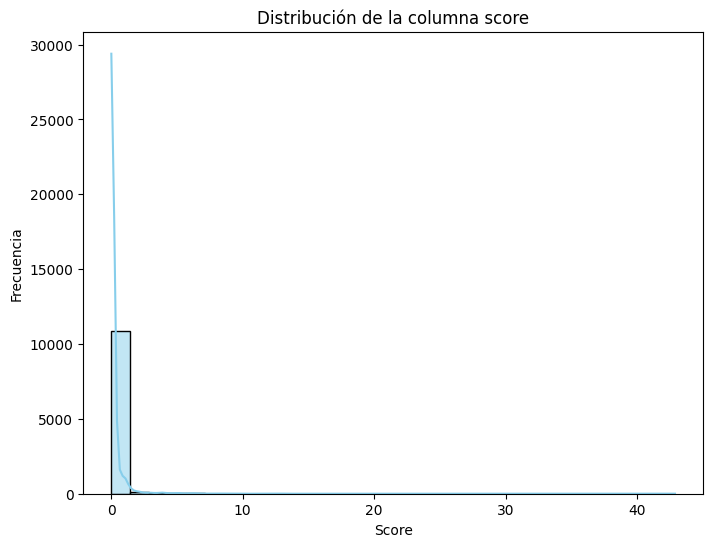

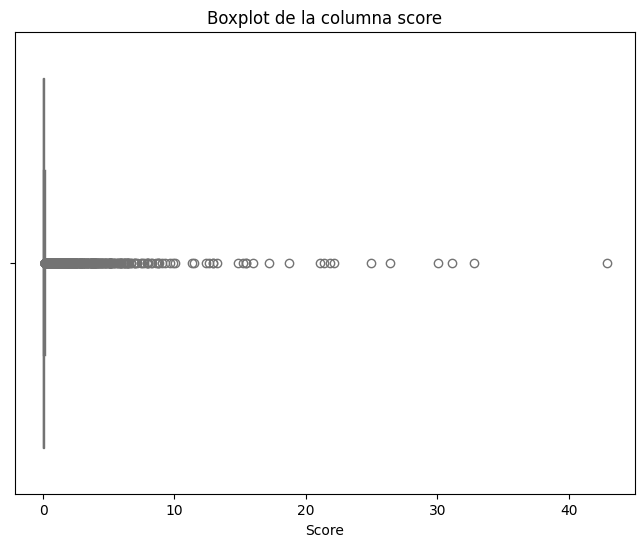

C:\Users\cmora\AppData\Local\Temp\ipykernel_12048\397709345.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(array, shade=True, color='purple')


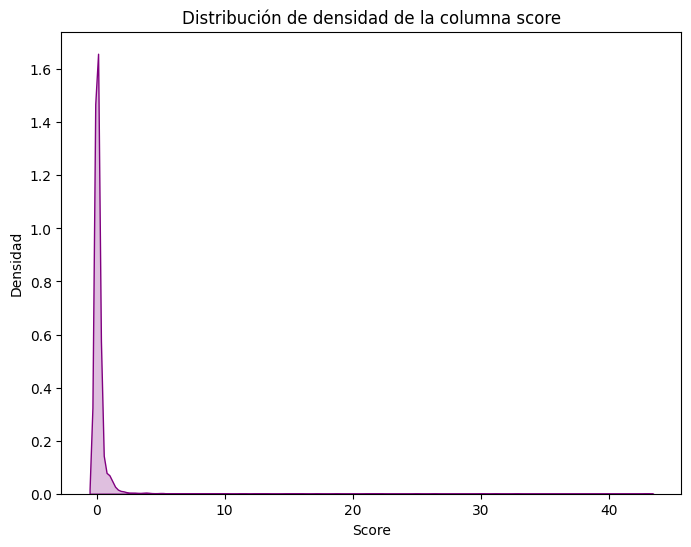

count    1.117900e+04
mean              inf
std               NaN
min      0.000000e+00
25%      0.000000e+00
50%      2.927996e-03
75%      6.554770e-02
max               inf
Name: Score, dtype: float64


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [31]:
histograma(df_alpha["Score"])
grafico_de_caja(df_alpha["Score"])
grafico_de_densidad(df_alpha["Score"])
resumen_estadistico(df_alpha["Score"])

DIFF

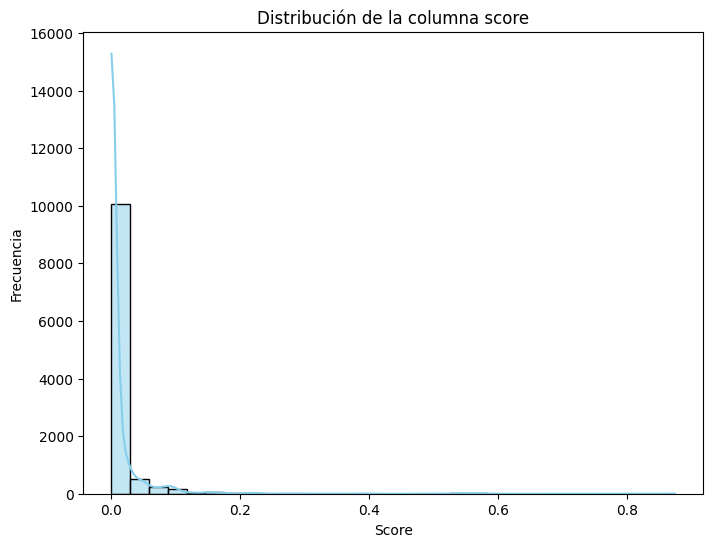

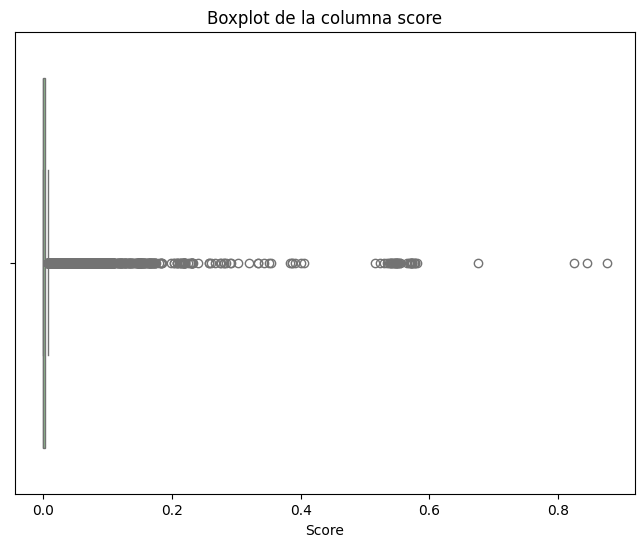

C:\Users\cmora\AppData\Local\Temp\ipykernel_12048\397709345.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(array, shade=True, color='purple')


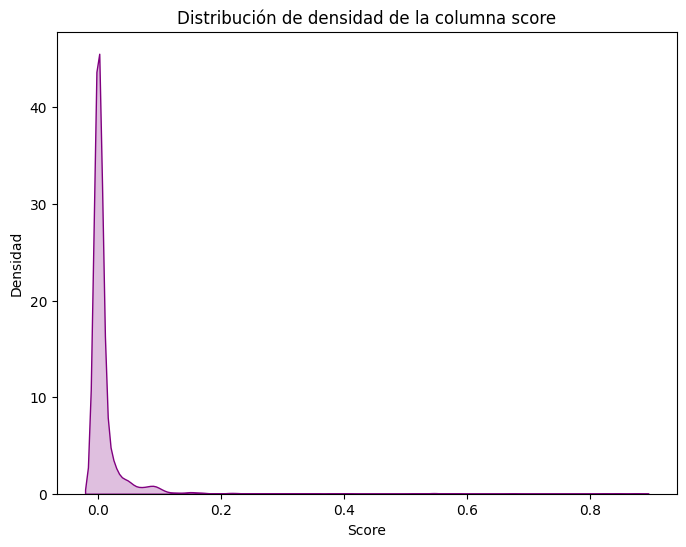

count    11179.000000
mean         0.011549
std          0.043869
min          0.000000
25%          0.000000
50%          0.000173
75%          0.003010
max          0.875140
Name: Score, dtype: float64


In [32]:
histograma(df_diff["Score"])
grafico_de_caja(df_diff["Score"])
grafico_de_densidad(df_diff["Score"])
resumen_estadistico(df_diff["Score"])